In [1]:
import pandas as pd

In [2]:
results = pd.read_csv("../Results/clean/countries.csv", index_col=0)
results

,model,epoch,temp,leftId,rightId,result,response,duration,timestamp
id,,,,,,,,,
1,mistral,0,0.0,0,1,0.6,Output: 0.6 China is a major producer of sem...,18.058701,2024-03-09 09:58:06
2,mistral,0,0.0,0,2,0.6,Output: 0.6 China is a major producer of sem...,7.181781,2024-03-09 09:58:13
3,mistral,0,0.0,0,3,0.6,Output: 0.6 China is a major producer of sem...,10.261206,2024-03-09 09:58:23
4,mistral,0,0.0,0,4,0.9,Output: 0.9 China is the worlds largest cons...,3.236487,2024-03-09 09:58:27
5,mistral,0,0.0,0,5,0.6,Output: 0.6 China is a major producer of sem...,10.703961,2024-03-09 09:58:37
...,...,...,...,...,...,...,...,...,...
5669,vicuna,4,1.0,6,8,0.5,"Input: Country: South Korea, Country: United ...",1.590942,2024-03-11 05:03:26
5670,vicuna,4,1.0,6,9,0.6,Input: Country: South Korea Country: Australi...,1.255026,2024-03-11 05:03:28
5671,vicuna,4,1.0,7,8,0.6,Input: Country: Hong Kong Country: United Arab...,1.476408,2024-03-11 05:03:29


In [3]:
results.shape

(5625, 9)

In [4]:
results.describe()

,epoch,temp,leftId,rightId,result,duration
count,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000,5625.000000
mean,2.000000,0.500000,2.666667,6.333333,0.411028,12.609360
std,1.414339,0.353585,2.211280,2.211280,0.590544,32.940975
min,0.000000,0.000000,0.000000,1.000000,-1.000000,0.155835
25%,1.000000,0.250000,1.000000,5.000000,0.330000,1.367212
50%,2.000000,0.500000,2.000000,7.000000,0.600000,9.200225
75%,3.000000,0.750000,4.000000,8.000000,0.800000,15.868607
max,4.000000,1.000000,8.000000,9.000000,0.950000,969.650070


In [5]:
results.result.value_counts()

result
 0.90    1203
 0.50    1062
 0.60     852
-1.00     742
 0.80     532
 0.20     331
 0.40     297
 0.30     285
 0.95     134
 0.70      49
 0.85      47
 0.10      41
 0.65      24
 0.45       8
 0.75       7
 0.25       4
 0.35       2
 0.67       1
 0.00       1
 0.07       1
 0.33       1
 0.16       1
Name: count, dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/gv/wlmg8wwj5y39xvbz768_rv9h0000gn/T/ipykernel_73048/3450389706.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x="result", data=results, bins=10, kde=True, palette="crest")


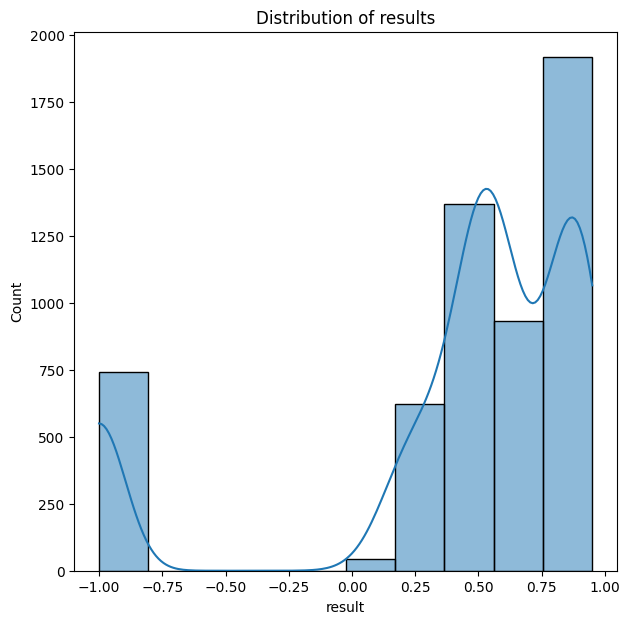

In [16]:
plt.figure(figsize=(7, 7))
plt.title("Distribution of results")
sns.histplot(x="result", data=results, bins=10, kde=True, palette="crest")
plt.show()

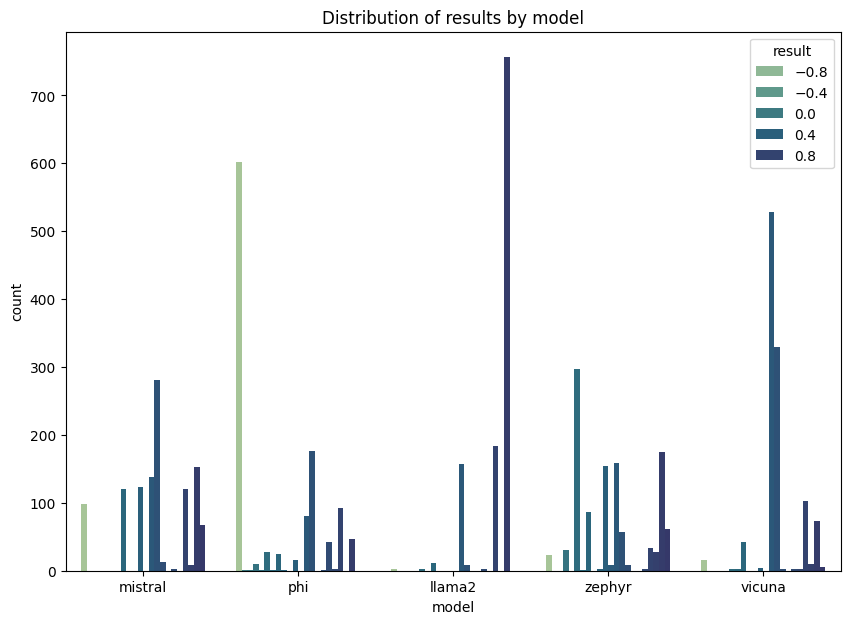

In [15]:
plt.figure(figsize=(10, 7))
plt.title("Distribution of results by model")
sns.countplot(x="model", hue="result", data=results, palette="crest")
plt.show()

/var/folders/gv/wlmg8wwj5y39xvbz768_rv9h0000gn/T/ipykernel_73048/1013003535.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="model", y="duration", data=durations, palette="crest")


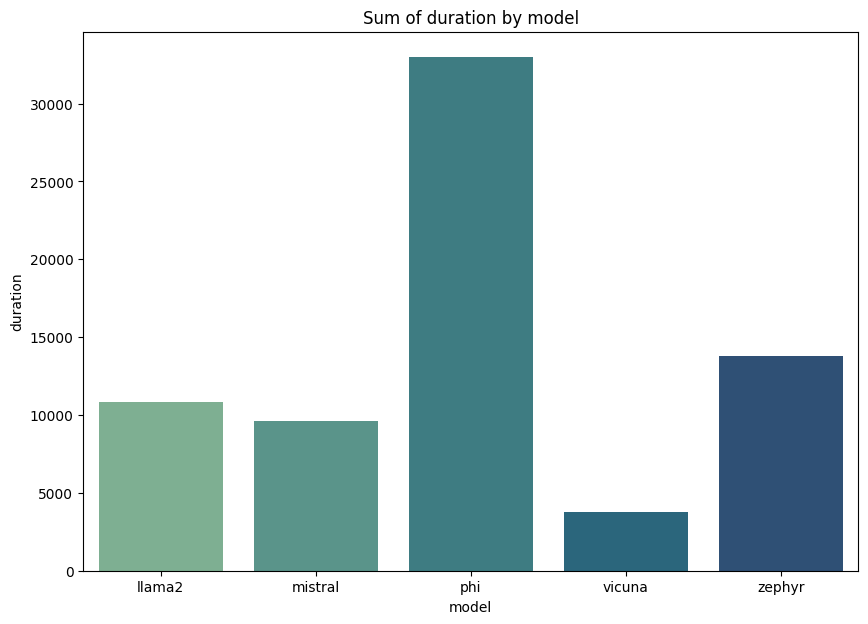

In [14]:
durations = results.groupby("model").duration.sum().reset_index()

plt.figure(figsize=(10, 7))
plt.title("Sum of duration by model")
sns.barplot(x="model", y="duration", data=durations, palette="crest")
plt.show()

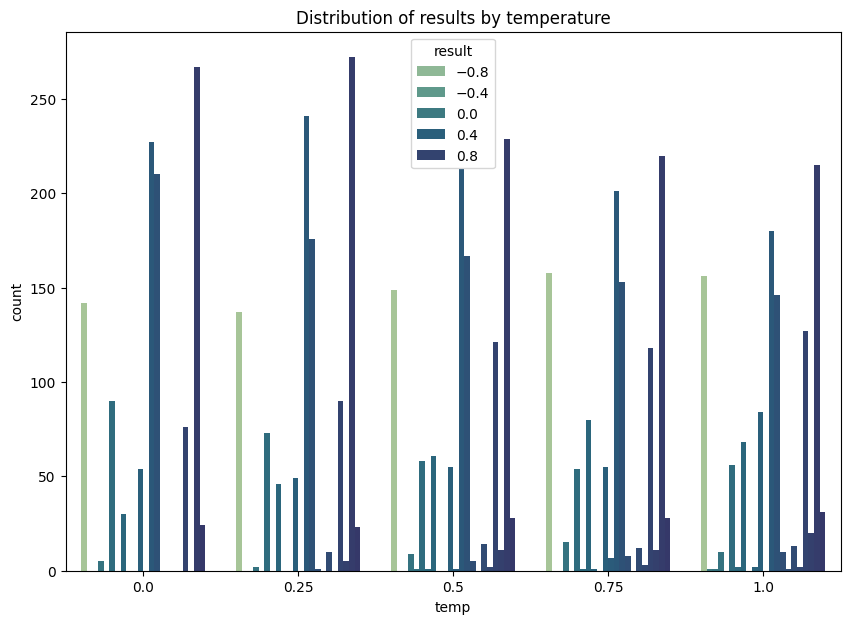

In [12]:
plt.figure(figsize=(10, 7))
plt.title("Distribution of results by temperature")
sns.countplot(x="temp", hue="result", data=results, palette="crest")
plt.show()

/var/folders/gv/wlmg8wwj5y39xvbz768_rv9h0000gn/T/ipykernel_73048/2104708592.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="leftId", y="result", data=maps, palette="crest")


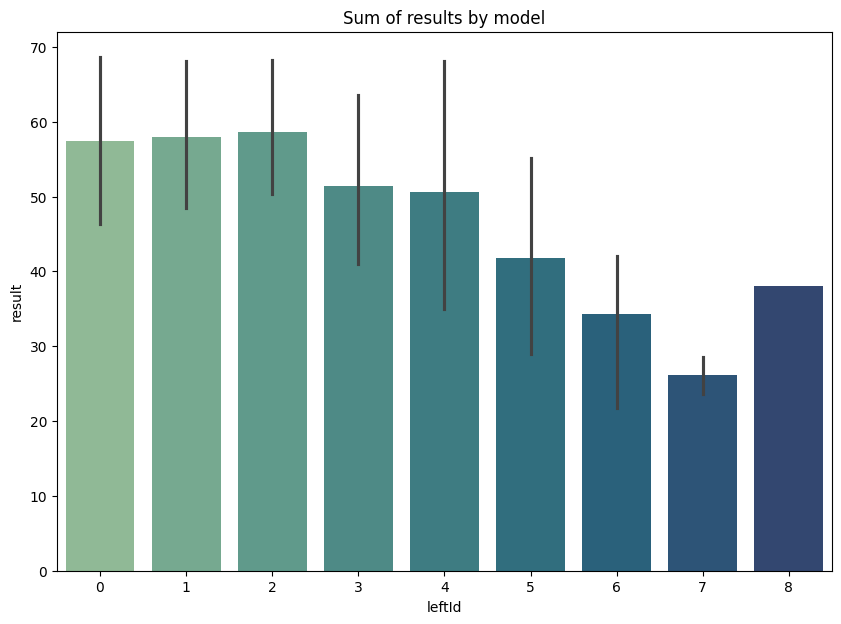

In [19]:
maps = results.groupby(['leftId', 'rightId']).result.sum().reset_index()

plt.figure(figsize=(10, 7))
plt.title("Sum of results by model")
sns.barplot(x="leftId", y="result", data=maps, palette="crest")
plt.show()

/var/folders/gv/wlmg8wwj5y39xvbz768_rv9h0000gn/T/ipykernel_73048/3464566512.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="leftId", y="result", data=maps, palette="crest")


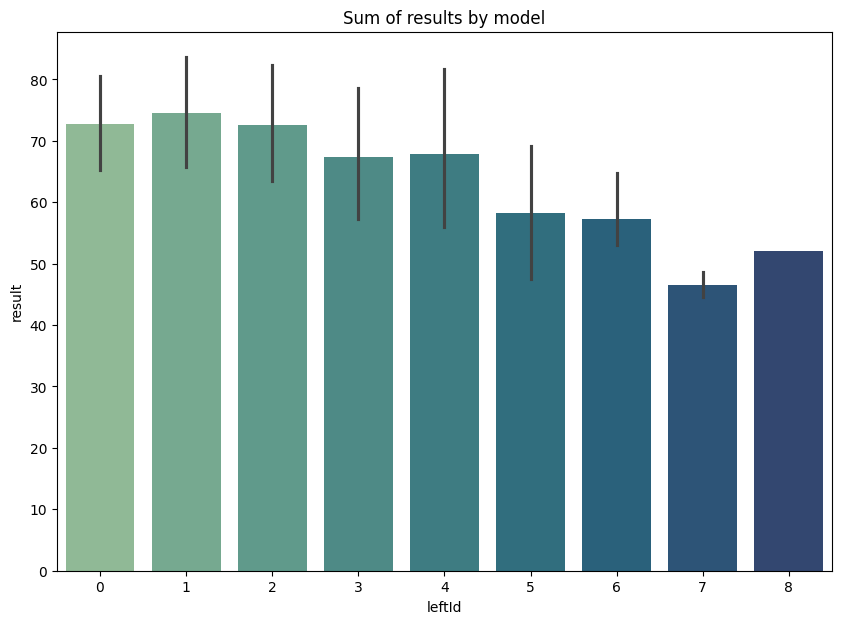

In [22]:
filtered = results[results.result != -1]
maps = filtered.groupby(['leftId', 'rightId']).result.sum().reset_index()

plt.figure(figsize=(10, 7))
plt.title("Sum of results by model")
sns.barplot(x="leftId", y="result", data=maps, palette="crest")
plt.show()

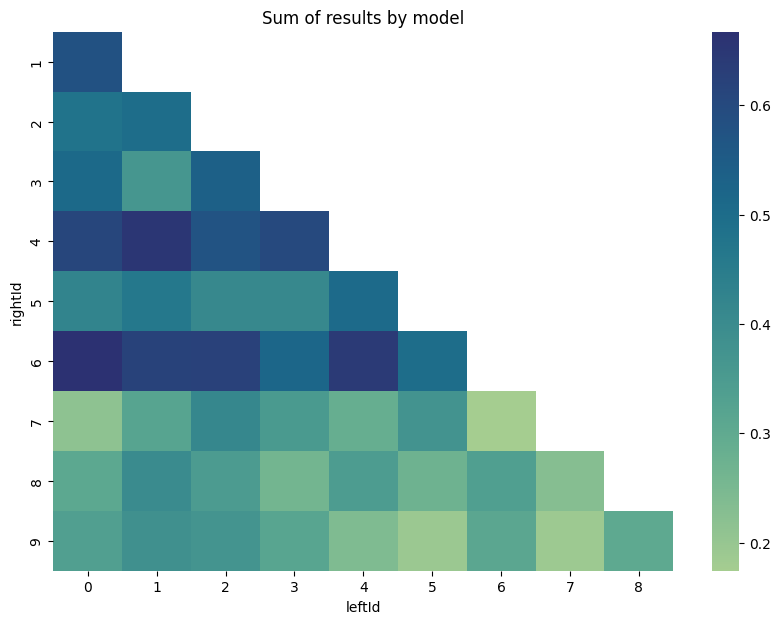

In [26]:
# create a heatmap of sum of results for each leftId and rightId pair
pivot = results.pivot_table(index="rightId", columns="leftId", values="result")
plt.figure(figsize=(10, 7))
plt.title("Sum of results by model")
sns.heatmap(pivot, cmap="crest")
plt.show()

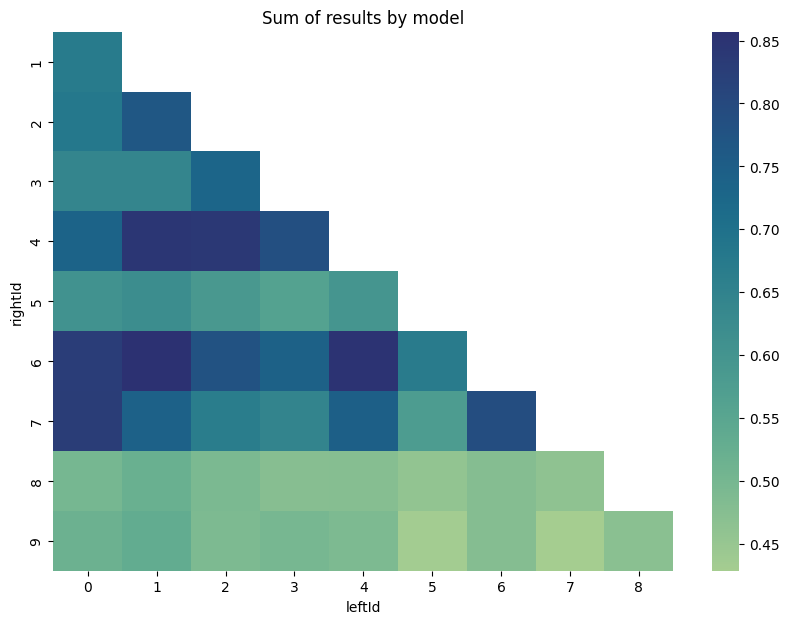

In [27]:
# create a heatmap of sum of results for each leftId and rightId pair
filtered = results[results.result != -1]
pivot = filtered.pivot_table(index="rightId", columns="leftId", values="result")
plt.figure(figsize=(10, 7))
plt.title("Sum of results by model")
sns.heatmap(pivot, cmap="crest")
plt.show()